# Projeto ll - Previsão de renda
Aluno: Henrique Sturion Vanceto

---

## Etapa 1 CRISP-DM: Entendimento do negócio

Começaremos este projeto com a primeira etapa do método CRISP-DM, denominada compreensão do negócio. O intuito é identificar quais variáveis apresentam maior correlação com a variável resposta renda para que possamos prevê-la. A partir disso, será possível construir modelos preditivos mais consistentes e alinhados aos objetivos do negócio, garantindo que os resultados obtidos tenham relevância para a tomada de decisão.


## Etapa 2 CRISP-DM: Entendimento dos dados
Na segunda etapa, vamos compreender melhor os dados para poder analizá-los. A tabela abaixo mostra as variáveis disponíveis no dataframe e seus respectivos tipos.


### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de Referência                                 | Object       |
| id_cliente              |  ID do Cliente                                      | Int          |
| sexo                    |  Sexo                                               | Object       |
| posse_de_veiculo        |  Possui Veículo?                                    | Bool         |
| posse_de_imovel         |  Possui Imóvel?                                     | Bool         |
| qtd_filhos              |  Quantidade de Filhos                               | Int          |
| tipo_renda              |  Tipo de Renda                                      | Object       |
| educacao                |  Educação                                           | Object       |
| estado_civil            |  Estado Civil                                       | Object       |
| tipo_residencia         |  Tipo de Residência                                 | Object       |
| idade                   |  Idade                                              | Int          |
| tempo_emprego           |  Tempo de Emprego                                   | Float        |
| qt_pessoas_residencia   |  Qtd. de Pessoas na Residência                      | Float        |
| renda                   |  Renda                                              | Float        |

#### Carregando os pacotes

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

#### Carregando os dados

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [4]:
renda.dtypes.value_counts()

object     6
int64      4
float64    3
bool       2
Name: count, dtype: int64

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis para entender como cada uma se comporta.

In [5]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 45.96it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Agora vamos exportar o arquivo .html para a pasta output.

In [6]:
prof.to_file('./Output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




Com base nas informações que o arquivo nos proporcionou, podemos agora fazer breves análises estatísticas. O dataframe, inicialmente com 14 variáveis e 15.000 linhas, possui um total de 2.573 valores faltantes (NaN), que serão posteriormente tratados neste projeto junto com linhas duplicadas. Das 14 variáveis, 2 podem ser descartadas: "Unnamed: 0" e "data_ref" não possuem relevância para a análise. Já a variável "id_cliente" se tornará o índice de cada linha no DataFrame. Por fim, as variáveis categóricas serão transformadas em dummies para que possam ser treinadas corretamente pelo scikit-learn, proporcionando um bom modelo de machine learning.

## Etapa 3 CRISP-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **Seleção**: já temos os dados selecionados adequadamente?
 - **Limpeza**: precisaremos identificar e tratar dados faltantes.
 - **Construção**: construção de novas variáveis.
 - **Integração**: temos apenas uma fonte de dados, não é necessário integração.
 - **Formatação**: os dados já se encontram em formatos úteis?



In [7]:
# Remove as colunas "Unnamed: 0" e "data_ref"
renda.drop(labels=['Unnamed: 0', 'data_ref'], axis = 1, inplace=True)

In [8]:
# Torna a coluna "id_cliente" o novo índice
renda.set_index("id_cliente", inplace=True)

In [9]:
# Dropa valores ausentes (NaN)
renda = renda.dropna()

In [10]:
# Confere se ainda há algum valor ausente
renda.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [11]:
# Confere se há valores duplicados
renda.duplicated().sum()

np.int64(3772)

In [12]:
# Dropa linhas duplicadas
renda = renda.drop_duplicates()

In [13]:
# Transforma as variáveis categóricas em dummies
renda = pd.get_dummies(
    renda,
    columns=['sexo', 'tipo_renda', 'educacao', 'tipo_residencia', 'estado_civil'],
    drop_first=True
)

In [14]:
renda.head(1)

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo
id_cliente,,,,,,,,,,,,,,,,,,,,,
15056,False,True,0,26,6.60274,1.0,8060.34,False,False,True,...,False,True,False,False,False,False,False,True,False,False


In [15]:
renda.dtypes

posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
renda                            float64
sexo_M                              bool
tipo_renda_Bolsista                 bool
tipo_renda_Empresário               bool
tipo_renda_Pensionista              bool
tipo_renda_Servidor público         bool
educacao_Pós graduação              bool
educacao_Secundário                 bool
educacao_Superior completo          bool
educacao_Superior incompleto        bool
tipo_residencia_Casa                bool
tipo_residencia_Com os pais         bool
tipo_residencia_Comunitário         bool
tipo_residencia_Estúdio             bool
tipo_residencia_Governamental       bool
estado_civil_Separado               bool
estado_civil_Solteiro               bool
estado_civil_União                  bool
estado_civil_Viú

In [16]:
# Função para tratar outliers
def replace_outliers_with_median(renda):
    for col in renda.select_dtypes(include='number').columns:
        q1 = renda[col].quantile(0.25)
        q3 = renda[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identificar outliers
        outliers = (renda[col] < lower_bound) | (renda[col] > upper_bound)

        # Substituir outliers pela mediana da coluna
        renda.loc[outliers, col] = renda[col].median()

    return renda

In [17]:
# Aplica a função ao DataFrame
renda = replace_outliers_with_median(renda)

Uma vez realizadas as etapas acima, temos então um DataFrame com dados tratados, contendo apenas booleanos, inteiros ou floats.

## Etapa 4 CRISP-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


In [18]:
# Separa as variáveis
X = renda.drop(['renda'], axis=1).copy()
y = renda['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

Na etapa abaixo, basta escolher o valor da profundidade máxima (max_depth) que vai resultar em um R quadrado mais elevado.

In [19]:
# Função para treinar e avaliar modelos
def treinar_aval_modelo(modelo, nome_modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{nome_modelo} | R²: {r2:.4f} | MSE: {mse:.2f}')
    return r2, mse

In [20]:
# Testa o modelo de Decision Tree
dt_model = DecisionTreeRegressor(max_depth=7, random_state=100)
treinar_aval_modelo(dt_model, 'Decision Tree', X_train, X_test, y_train, y_test)

Decision Tree | R²: 0.1524 | MSE: 7283182.86


(0.15238582102790643, 7283182.862283034)

In [21]:
# Testa o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=100)
treinar_aval_modelo(rf_model, 'Random Forest', X_train, X_test, y_train, y_test)

Random Forest | R²: 0.1834 | MSE: 7016605.22


(0.1834100302739352, 7016605.220353333)

Obtivemos, então, um melhor resultado com o modelo de Random Forest com profundidade máxima igual a 7, proporcionando um R² de 0.1834 e um MSE de 7016605.22.

In [22]:
# Faz previsões com o melhor modelo (Random Forest)
y_pred = rf_model.predict(X_test)

In [23]:
# Analisa os resíduos
residuos = y_test - y_pred

print("Média dos resíduos:", np.mean(residuos))
print("Desvio padrão dos resíduos:", np.std(residuos))

Média dos resíduos: -46.230302192779384
Desvio padrão dos resíduos: 2648.4840908550873


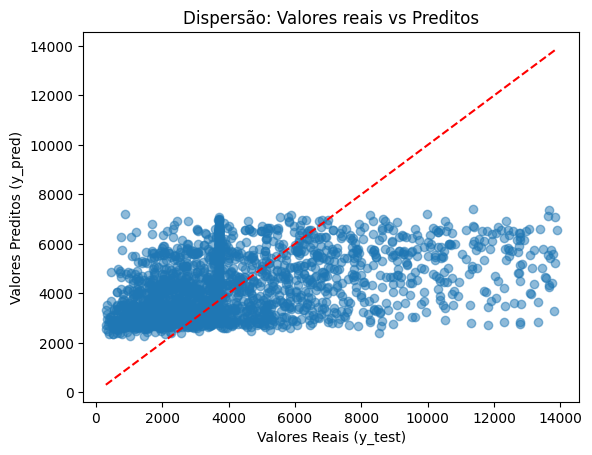

In [24]:
# Dispersão entre valores reais e previstos
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Valores Preditos (y_pred)")
plt.title("Dispersão: Valores reais vs Preditos")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--') 
plt.show()

Aqui, vemos que os pontos ficam abaixo da linha para valores altos de renda, o que sugere que o modelo tende a subestimar as rendas maiores (underfitting nos extremos). Já para valores baixos de renda, parece haver mais proximidade à linha, indicando melhor desempenho.

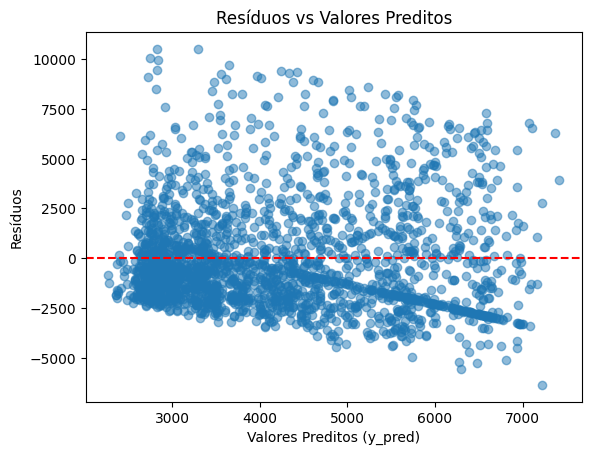

In [25]:
# Resíduos vs Valores Preditos
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Preditos (y_pred)")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Preditos")
plt.show()

Nesse gráfico, nota-se uma dispersão maior para resíduos positivos (modelo subestima em alguns casos), e uma leve tendência inclinada para baixo, sugerindo que para valores maiores previstos, os resíduos se tornam negativos (o modelo superestima rendas menores e subestima rendas maiores).

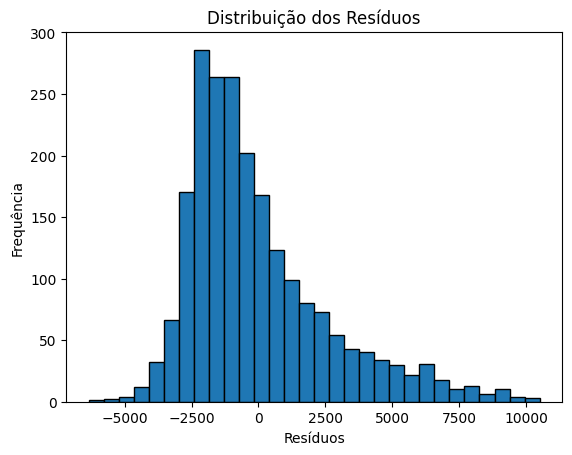

In [26]:
# Histograma dos resíduos
plt.hist(residuos, bins=30, edgecolor='black')
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")
plt.show()

Por fim, vemos no histograma que há uma frequência maior de resídios negativos, mostrando que o modelo tende a subestimar os valores em geral.

Para tratar esse problema, existem algumas alternativas. Vamos começar aplicando o logarítmo na variável resposta para ver se é suficiente.

In [27]:
# Transforma o y em logaritmo
y_log = np.log1p(y)

In [28]:
# Separa as variáveis
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.25, random_state=100)

In [29]:
# Testa o modelo de Random Forest com o logarítmo
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=100)
rf_model.fit(X_train, y_train_log)

RandomForestRegressor(max_depth=7, random_state=100)

In [30]:
# Faz previsões com o logaritmo
y_pred_log = rf_model.predict(X_test)

Agora precisamos comparar os resíduos aos do espaço original (sem logaritmo), visto que estão em escalas diferentes.

In [31]:
# Retorna ao espaço original
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test_log)
residuos_reais = y_test_orig - y_pred

print("Média dos resíduos (real):", np.mean(residuos_reais))
print("Desvio padrão dos resíduos (real):", np.std(residuos_reais))

Média dos resíduos (real): 628.8938080623105
Desvio padrão dos resíduos (real): 2654.0705554442366


Com base nos valores acima, podemos chegar à conclusão de que a aplicação do logaritmo não nos proporcionou bons resultados, visto que o desvio padrão manteve-se igual e a média dos resíduos subiu para 628.8. Vamos agora buscar outra alternativa para o problema, começando pela aplicação do GradientBoostingRegressor, que se trata de uma outra forma de regressão mais aplicada, onde cada árvore corrige os erros da anterior.

In [60]:
# Testa o modelo de Gradient Boosting
gbr_model = GradientBoostingRegressor(
    n_estimators=300,  
    learning_rate=0.05, 
    max_depth=3,        
    random_state=100
)

In [61]:
# Aplica a função de treinar modelos
treinar_aval_modelo(
    gbr_model,
    'Gradient Boosting',
    X_train, X_test, y_train, y_test
)

Gradient Boosting | R²: 0.1875 | MSE: 6981083.25


(0.1875440641459003, 6981083.2512837425)

In [56]:
# Faz previsões com o melhor modelo (Gradient Boosting)
y_pred = gbr_model.predict(X_test)

In [57]:
# Analisa os resíduos
residuos = y_test - y_pred

print("Média dos resíduos:", np.mean(residuos))
print("Desvio padrão dos resíduos:", np.std(residuos))

Média dos resíduos: -61.492901596591274
Desvio padrão dos resíduos: 2645.2309489675445


## Etapa 5 CRISP-DM: Avaliação dos resultados


No modelo apresentado, realizamos inicialmente a limpeza dos dados, retirando outliers e substituindo-os pelo desvio padrão da respectiva coluna. Também removemos linhas duplicadas e transformamos todas as variáveis categóricas em variáveis dummy.

Em seguida, treinamos o modelo utilizando Decision Tree e Random Forest. Aplicamos o logaritmo da variável resposta para reduzir o desvio padrão dos resíduos e, por fim, testamos o modelo com Gradient Boosting, que proporcionou um melhor resultado.

## Etapa 6 CRISP-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [62]:
# Calcula o MSE
mse = mean_squared_error(y_test, y_pred)
mse

7001028.150322504

In [65]:
# Calcula o R² de treino e de teste
r2_train = gbr_model.score(X_train, y_train)
r2_test = gbr_model.score(X_test, y_test)

print(r2_train)
print(r2_test)

0.2419402008225069
0.1875440641459003
